In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE

## SequentialFeatureSelector(from mlxtend.feature_selection)
* SequentialFeatureSelector : 전진 선택(Forward Selection) 또는 후진 제거(Backward Elimination)를 통해 특징 선택을 수행하는 클래스이다. 모델이 예측에 가장 유리한 변수(특징)들을 선택하도록 도와준다.
* Ex) 특정 특성을 추가하거나 제거하면서, 성능이 가장 좋은 특징 조합을 찾는다.

## make_classification(from sklearn.datasets)
* make_classification : 모의 분류 데이터를 생성하는 함수로, 분류 문제를 실험할 때 데이터셋이 없는 경우 가상 데이터를 생성할 수 있다.
* 클래스 수, 특징 수, 클러스터 수 등을 설정해 다양한 유형의 데이터를 생성할 수 있다.

## RandomForestClassifier(from sklearn.ensemble)
* RandomForestClassifier : 랜덤 포레스트 알고리즘을 이용한 분류기이다. 여러 개의 결정 트리를 사용하여 결과를 종합하여 예측하는 방식으로, 높은 예측 성능과 과적합 방지 효과가 있다.
* 모델이 다수의 트리를 학습한 후 각 트리의 예측을 모아서 최종 예측을 만든다.

## RFECV(from sklearn.feature_selection)
* RFECV(Recursive Feature Elimination with Cross-Validation) : 특징 선택 기법의 하나로, 모델이 성능이 떨어지는 특성을 반복적으로 제거해가면서 최적의 특성 조합을 찾아낸다. 
* 최적의 특성 수를 자동으로 찾기 때문에 유용하다.

## StratifiedKFold(from sklearn.model_selection)
* StratifiedKFold : 층화 교차 검증을 위한 함수로, 각 폴드에 클래스 비율이 유지되도록 데이터를 나눈다. 이진 분류나 다중 클래스 분류에서 데이터 불균형이 있을 때 사용하면 유리하다.
* n_splits 파라미터로 폴드 수를 지정할 수 있다.

## RFE(from sklearn.feature_selection)
* RFE(Recursive Feature Elimination) : 주어진 모델을 기반으로 특성을 하나씩 제거하면서 최적의 특성 조합을 찾는 기법이다. 주로 중요한 특성만 남기고 나머지는 제거하여 모델을 단순화하는 데 사용한다.
* RFECV와 유사하지만, 교차 검증이 포함되지 않는다는 점이 다르다.

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.dropna(subset=['age', 'embarked'], inplace = True)
# dropna()는 결측값을 제거하는 함수입니다.
# subset 매개변수는 결측값을 확인할 특정 열을 지정하는 데 사용됩니다.

In [4]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
titanic = pd.get_dummies(titanic, columns = ['sex', 'embarked', 'class'], drop_first = True)
#pd.get_dummies(): 주어진 열의 범주형 데이터를 더미 변수로 변환하는 함수이다. 즉, 각 범주를 0 또는 1로 인코딩하여 숫자 데이터로 바꾼다.
#columns=['sex', 'embarked', 'class']: 원-핫 인코딩할 열을 지정한다. 이 예제에서는 sex, embarked, class 열이 대상이다.
#drop_first=True: 첫 번째 범주를 제거하여 다중 공선성 문제를 방지한다. 예를 들어, sex 열의 범주가 'male'과 'female'인 경우, /
#drop_first=True를 사용하면 'female' 열만 남고 'male'은 생략된다. 이는 불필요한 중복을 줄이고 모델의 성능을 개선할 수 있다.

In [6]:
X =titanic.drop(['survived','deck','alone','who','adult_male','alive','embark_town'], axis =1)

In [7]:
X = X*1
y = titanic['survived']

In [8]:
#훈련 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 111)

In [9]:
#모델 학습
model = LogisticRegression(max_iter = 200)

## LogisticRegression의 max_iter, 즉 반복에 대해서...
#### 여기서 말하는 반복은 경사 하강법(Gradient Descent)등의 최적화 알고리즘이 모델의 가중치를 업데이트 하는 과정을 반복한다는 뜻.

### 반복의 목적
* 로지스틱 회귀(Logistic Regression)는 모델이 데이터에 맞게 예측할 수 있도록 가중치(또는 파라미터)를 학습한다. 최적화 과정에서 이 가중치를 여러 번 조정하면서, 손실 함수의 값을 최소화하여 최적의 가중치를 찾아낸다.

In [10]:
X

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,3,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0,1,0,0,1
886,2,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [11]:
#SequentialFeatureSelector
#SFS(모델을 선정할 때 어떤 방법으로 선정할지, 선정방법, scoring = 어떤 평가로 볼건지?, cv = 교차검증 값들)
sfs_forward = SFS(model, k_features = 'best', forward = True, floating = False, scoring = 'accuracy', cv = 3)
sfs_backward = SFS(model, k_features = 'best', forward = False, floating = False, scoring = 'accuracy', cv = 3)
sfs_stepwise = SFS(model, k_features = 'best', forward = True, floating = False, scoring = 'accuracy', cv = 3)

#각 방법을 학습하고 확인해보기
sfs_forward_f = sfs_forward.fit(X_train, y_train)
sfs_backward_f = sfs_backward.fit(X_train, y_train)
sfs_stepwise_f = sfs_stepwise.fit(X_train, y_train)

/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_se

/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_se

/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/se

/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_se

/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_se

In [12]:
#선택된 특성 출력
print(f'sfs_forward 피처 출력{sfs_forward_f.k_feature_names_}')
print(f'sfs_backward 피처 출력{sfs_backward_f.k_feature_names_}')
print(f'sfs_stepwise 피처 출력{sfs_stepwise_f.k_feature_names_}')

sfs_forward 피처 출력('pclass', 'age', 'sibsp', 'sex_male', 'embarked_S')
sfs_backward 피처 출력('pclass', 'age', 'sibsp', 'sex_male', 'embarked_S')
sfs_stepwise 피처 출력('pclass', 'age', 'sibsp', 'sex_male', 'embarked_S')


Text(0.5, 1.0, 'sfs_stepwise')

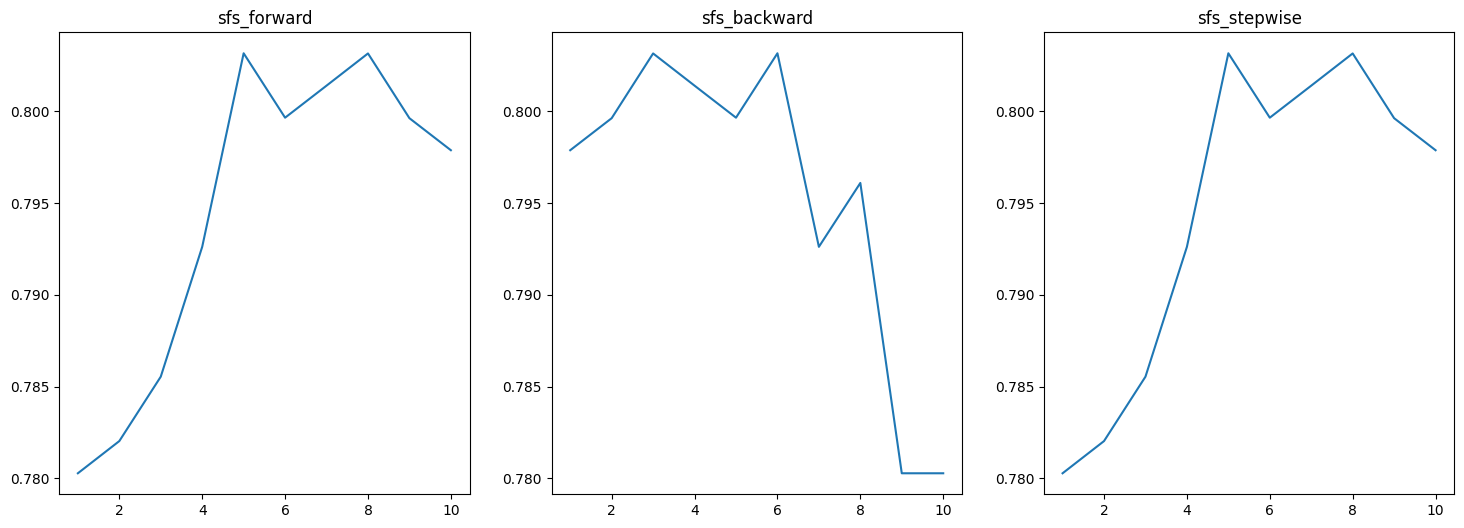

In [13]:
#시각화를 통해서 피처를 선택했을 때 어떤 식의 평가나오는지
fig, ax= plt.subplots(1,3, figsize=(18,6))

ax[0].plot(range(1, len(sfs_forward_f.subsets_)+1),[sfs_forward_f.subsets_[i]['avg_score'] for i in sfs_forward_f.subsets_],)
ax[0].set_title('sfs_forward')

ax[1].plot(range(1, len(sfs_backward_f.subsets_)+1),[sfs_backward_f.subsets_[i]['avg_score'] for i in sfs_backward_f.subsets_],)
ax[1].set_title('sfs_backward')

ax[2].plot(range(1, len(sfs_stepwise_f.subsets_)+1),[sfs_stepwise_f.subsets_[i]['avg_score'] for i in sfs_stepwise_f.subsets_],)
ax[2].set_title('sfs_stepwise')

## RFE
* RFE 모델을 사용해서 특성의 중요도를 평가
    * 모델은 회귀나 분류
    * 타겟 변수에 영향을 미치는 것들을 측정하는 것.
* 순차적 특성 제거
    * 처음에는 전체 특성을 사용해 모델을 학습하고, 특성의 중요도 또는 가중치를 평가하여 중요도가 낮은 특성을 하나씩 제거한다.
    * 특성을 제거할 때마다 모델을 다시 학습시키면서 가장 중요하지 않은 것은 찾아내고 원하는 수의 특성만 남긴다.
* 반복적인 제거 과정
    * **지정된 특정 수 까지 반복적으로 학습과 제거를 수행**
* 하이퍼파라미터
    * estimator : 특성의 중요도 모델 평가할 때 지정하는 것, 속성을 여러가지로 볼 수 있다.
    * n_feature_to_select : 피처를 선택할 수 있다.
    * step : 반복하면서 제거할 특성 수. step = 1 -> 1번에 1개 제거. 이런 식으로 비율로도 제거 가능하다.

## RFECV
* 확장된 버전으로 교차검증을 통해서 최적의 특성 수를 자동으로 결정. 반복해서 특성 제거하면서 교차검증까지 수행하여 모델 평가. -> 특성 수를 찾는다.
    * 자동으로 특성의 수를 찾아주고
* 하이퍼파라미터
    * min_feature_to_select : 최소 선택될 특성 수
    * cv 교차검증 분할 수
    * scoring모델 성능에 대한 평가 지표

## 공통적으로 사용하는 함수
* ranking_ : 특성 중요도
* support_ : 선택된 특성이 True
* n_features_ : 선택된 특성의 개수
* estimator_ : 학습 완료된 상태 정보 확인

In [14]:
X, y = load_iris(return_X_y = True)

In [15]:
model = LogisticRegression(max_iter = 200)

In [16]:
selector = RFE(estimator = model, n_features_to_select = 2)
selector = selector.fit(X,y)

In [17]:
print(f'선택된 특성을 출력 : {selector.support_}')

선택된 특성을 출력 : [False False  True  True]


In [18]:
print(f'선택된 특성을 출력 : {selector.ranking_}')

선택된 특성을 출력 : [3 2 1 1]


In [19]:
#RFECV 교차검증이 가능하니 여러 모델을 돌려서 비교
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
titanic = sns.load_dataset('titanic')
titanic.dropna(subset=['age', 'embarked'], inplace = True)

titanic = pd.get_dummies(titanic, columns = ['sex', 'embarked', 'class'], drop_first=True)

X = titanic.drop(['survived','deck','alone','who','adult_male','alive','embark_town'], axis =1)
X = X*1
y = titanic['survived']

In [21]:
#훈련 데이터 나누기
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

#독립변수와 종속변수 설정
X = titanic.drop(['survived', 'deck', 'alone', 'who', 'adult_male', 'alive', 'embark_town'], axis = 1)
y = titanic['survived']

#훈련 및 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

#모델정의
models = {
    'LogisticRegression' : LogisticRegression(max_iter = 200),
    'RandomForestClassifier' : RandomForestClassifier(),
    'SVC' : SVC(kernel = 'linear')
} 

#교차 검증 설정
cv = StratifiedKFold(3)

#결과를 정리할 DataFrame 
results = pd.DataFrame(columns = ['Model', 'Dataset', 'Accuracy', 'Precision', 'Recall', 'F1', 'Selected Features'])

#각 모델에 대해 RFECV 수행 및 결과 저장
for name, model in models.items():
    selector = RFECV(estimator = model, step = 1, cv = cv, scoring = 'accuracy')
    selector.fit(X_train, y_train)
    
    #train 및 test 데이터셋에 대한 평가
    for data in [('Train', X_train, y_train), ('Test', X_test, y_test)]:
        dataset_name, X_data, y_data = data
        y_pred = selector.predict(X_data)
        
        accuracy = accuracy_score(y_data, y_pred)
        precision = precision_score(y_data, y_pred)
        recall = recall_score(y_data, y_pred)
        f1 = f1_score(y_data, y_pred)
        
        selected_features = ', '.join(X.columns[selector.support_])
        
        result_row = pd.DataFrame({
            'Model' : [name],
            'Dataset' : [dataset_name],
            'Accuracy' : [accuracy],
            'Precision' : [precision],
            'Recall' : [recall],
            'F1' : [f1],
            'Selected Features' : [selected_features]
        })
        results = pd.concat([results, result_row], ignore_index = True)
        
print(results)

/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

                    Model Dataset  Accuracy  Precision    Recall        F1  \
0      LogisticRegression   Train  0.799649   0.765854  0.704036  0.733645   
1      LogisticRegression    Test  0.825175   0.884615  0.707692  0.786325   
2  RandomForestClassifier   Train  0.985940   0.995392  0.968610  0.981818   
3  RandomForestClassifier    Test  0.818182   0.882353  0.692308  0.775862   
4                     SVC   Train  0.780316   0.737864  0.681614  0.708625   
5                     SVC    Test  0.776224   0.811321  0.661538  0.728814   

                                   Selected Features  
0  pclass, age, sibsp, parch, sex_male, embarked_...  
1  pclass, age, sibsp, parch, sex_male, embarked_...  
2           pclass, age, fare, sex_male, class_Third  
3           pclass, age, fare, sex_male, class_Third  
4                                           sex_male  
5                                           sex_male  


In [22]:
results

,Model,Dataset,Accuracy,Precision,Recall,F1,Selected Features
0,LogisticRegression,Train,0.799649,0.765854,0.704036,0.733645,"pclass, age, sibsp, parch, sex_male, embarked_..."
1,LogisticRegression,Test,0.825175,0.884615,0.707692,0.786325,"pclass, age, sibsp, parch, sex_male, embarked_..."
2,RandomForestClassifier,Train,0.985940,0.995392,0.968610,0.981818,"pclass, age, fare, sex_male, class_Third"
3,RandomForestClassifier,Test,0.818182,0.882353,0.692308,0.775862,"pclass, age, fare, sex_male, class_Third"
4,SVC,Train,0.780316,0.737864,0.681614,0.708625,sex_male
5,SVC,Test,0.776224,0.811321,0.661538,0.728814,sex_male
